# NSE Stock Price prediction using Facebook Prophet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [2]:
!pip install prophet

In [3]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
from prophet.diagnostics import performance_metrics
from prophet.serialize import model_to_json, model_from_json

In [4]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [5]:
df = pd.read_csv('/content/drive/MyDrive/STOCK PRICE PRED/NSE_train.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [6]:
df['Date'].tail()

986    2023-12-22
987    2023-12-26
988    2023-12-27
989    2023-12-28
990    2023-12-29
Name: Date, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       991 non-null    object 
 1   Open       991 non-null    float64
 2   High       991 non-null    float64
 3   Low        991 non-null    float64
 4   Close      991 non-null    float64
 5   Adj Close  991 non-null    float64
 6   Volume     991 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.3+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02
mean,15822.760745,15900.697561,15716.523084,15812.712220,15812.712220,4.038158e+05
std,3121.117024,3112.728627,3130.668302,3124.026557,3124.026557,2.194238e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,13812.775391,13932.549805,13693.399902,13845.375000,13845.375000,2.488500e+05
50%,16933.250000,17062.449219,16820.400391,16945.050781,16945.050781,3.147000e+05
75%,17974.149414,18085.950195,17881.924805,17995.674805,17995.674805,5.434000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219,1.811000e+06


# Data Visualization using plotly express- Visualizing the historical performance of NSE

In [9]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
px.area(df,x='Date',y='Volume')

In [ ]:
px.bar(df,y='Volume')

In [ ]:
px.box(df,y='Close')

# Understanding Facebook Prophet

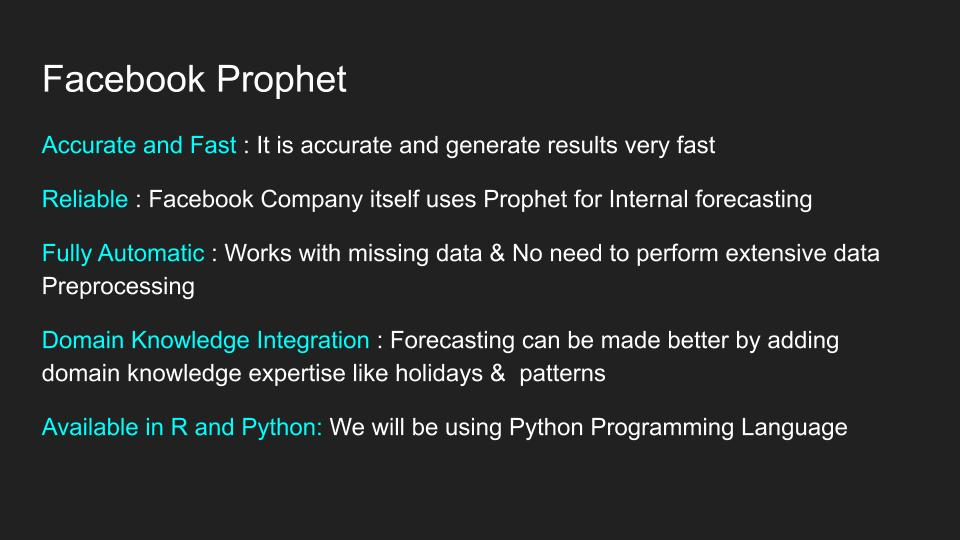

## Data Preperation

In [12]:
cols = ['Date','Close']
dff = pd.DataFrame(df,columns=cols)

In [13]:
dff.head()

,Date,Close
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195


In [14]:
prophet_df = dff.rename(columns={'Date':'ds','Close':'y'})
prophet_df.head()

,ds,y
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195


## Creating Facebook Prophet Model with no tuning

In [ ]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vwpgshy/34blko0f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vwpgshy/tm_57_0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90996', 'data', 'file=/tmp/tmp7vwpgshy/34blko0f.json', 'init=/tmp/tmp7vwpgshy/tm_57_0a.json', 'output', 'file=/tmp/tmp7vwpgshy/prophet_modelhm6kzfm5/prophet_model-20240321090710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=51+25)
future.tail()

,ds
1062,2024-03-10
1063,2024-03-11
1064,2024-03-12
1065,2024-03-13
1066,2024-03-14


In [ ]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1062,2024-03-10,20968.883068,19754.063302,21039.245303,20621.014970,21267.993204,-560.973783,-560.973783,-560.973783,-148.342121,-148.342121,-148.342121,-412.631662,-412.631662,-412.631662,0.0,0.0,0.0,20407.909285
1063,2024-03-11,20977.320217,19846.882767,21198.973069,20622.475001,21278.630886,-417.904585,-417.904585,-417.904585,32.904993,32.904993,32.904993,-450.809578,-450.809578,-450.809578,0.0,0.0,0.0,20559.415633
1064,2024-03-12,20985.757366,19939.519535,21228.488505,20620.892030,21289.957197,-413.948069,-413.948069,-413.948069,72.199116,72.199116,72.199116,-486.147185,-486.147185,-486.147185,0.0,0.0,0.0,20571.809297
1065,2024-03-13,20994.194515,19913.940156,21219.782115,20619.111923,21305.995641,-437.204525,-437.204525,-437.204525,81.166811,81.166811,81.166811,-518.371336,-518.371336,-518.371336,0.0,0.0,0.0,20556.989991
1066,2024-03-14,21002.631664,19844.193587,21209.868084,20618.997638,21318.269854,-480.115014,-480.115014,-480.115014,67.138917,67.138917,67.138917,-547.253930,-547.253930,-547.253930,0.0,0.0,0.0,20522.516651


In [17]:
test_df = pd.read_csv('/content/drive/MyDrive/STOCK PRICE PRED/NSE_test.csv')
# test = test_df[['Date']]
# futurea = future.rename(columns={'Date':'ds'})
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-01,21727.750000,21834.349609,21680.849609,21741.900391,21741.900391,154000
1,2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700
2,2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900
3,2024-01-04,21605.800781,21685.650391,21564.550781,21658.599609,21658.599609,339200
4,2024-01-05,21705.750000,21749.599609,21629.199219,21710.800781,21710.800781,309300


In [ ]:
def print_rmse_mape(test_df,forecast):
  pred=forecast[forecast['ds'].isin(test_df['Date'])]
  rmse = np.sqrt(mean_squared_error(y_true=test_df['Close'],
                    y_pred=pred['yhat']))

  mape = mean_absolute_percentage_error(y_true=test_df['Close'],
                    y_pred=pred['yhat']) * 100

  return rmse,mape

In [ ]:
rmse,mape = print_rmse_mape(test_df,forecast)
print('RMSE =',rmse)
print('MAPE =',mape)

RMSE = 1005.7031906285041
MAPE = 4.248515264666692


In [10]:
def fit_prophet(params):
  model = Prophet(**params)
  model.fit(prophet_df)
  future = model.make_future_dataframe(periods=51+25)
  forecast = model.predict(future)
  return model,forecast,future

# Hyperparameter tuning

**Changepoints** are the points in your data where there are sudden and abrupt changes in the trend. An example of this would be if you had a campaign and suddenly you got 50 000 more constant visitors to your website. The changepoint will be the timeslot where this big change occurred.

**Seasonality** in Facebook Prophet refers to recurring patterns or fluctuations in a time series data that happen with a fixed frequency over time. These patterns can repeat daily, weekly, monthly, yearly, or at some other regular interval. Seasonality captures the influence of such periodic fluctuations on the time series data.

`changepoint_range`: This is the proportion of the history in which the trend is allowed to change.

`changepoint_prior_scale`:The other parameter, changepoint_prior_scale, is there to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data.

`seasonaliy_prior_scale` : This parameter will again allow your seasonalities to be more flexible.

In [ ]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale': [0.1,0.2,0.3,0.4,0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'changepoint_range': [0.80,0.90,0.95,1.0],
    }

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
mapes = []
# Use cross validation to evaluate all parameters
for params in all_params:
    model = Prophet(changepoint_prior_scale = params['changepoint_prior_scale'],
          seasonality_prior_scale = params['seasonality_prior_scale'],
          changepoint_range = params['changepoint_range'],
          daily_seasonality=True
          ).fit(prophet_df)

    future = model.make_future_dataframe(periods=51+25)
    forecast = model.predict(future)
    rmse,mape = print_rmse_mape(test_df,forecast)
    rmses.append(rmse)
    mapes.append(mape)

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
tuning_results['MAPE'] = mapes

print(tuning_results)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vwpgshy/7r1odk9g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vwpgshy/ryx_09g9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2495', 'data', 'file=/tmp/tmp7vwpgshy/7r1odk9g.json', 'init=/tmp/tmp7vwpgshy/ryx_09g9.json', 'output', 'file=/tmp/tmp7vwpgshy/prophet_modelva13dywz/prophet_model-20240321090733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vwpgshy/ev2zfum8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7vwpgshy/zj141vko.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

    changepoint_prior_scale  seasonality_prior_scale  changepoint_range  \
0                       0.1                     0.01               0.80   
1                       0.1                     0.01               0.90   
2                       0.1                     0.01               0.95   
3                       0.1                     0.01               1.00   
4                       0.1                     0.10               0.80   
..                      ...                      ...                ...   
75                      0.5                     1.00               1.00   
76                      0.5                    10.00               0.80   
77                      0.5                    10.00               0.90   
78                      0.5                    10.00               0.95   
79                      0.5                    10.00               1.00   

           rmse      MAPE  
0    273.961502  0.997679  
1    452.806400  1.564928  
2    330.778651

In [ ]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale  changepoint_range  \
0                       0.1                     0.01               0.80   
1                       0.1                     0.01               0.90   
2                       0.1                     0.01               0.95   
3                       0.1                     0.01               1.00   
4                       0.1                     0.10               0.80   
..                      ...                      ...                ...   
75                      0.5                     1.00               1.00   
76                      0.5                    10.00               0.80   
77                      0.5                    10.00               0.90   
78                      0.5                    10.00               0.95   
79                      0.5                    10.00               1.00   

           rmse      MAPE  
0    273.961502  0.997679  
1    452.806400  1.564928  
2    330.778651

In [ ]:
best_params = all_params[np.argmin(rmses)]
best_params['daily_seasonality']=True
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'changepoint_range': 0.8, 'daily_seasonality': True}


In [ ]:
i = np.argmin(rmses)
print('RMSE after tuning parameters =',rmses[i])
print('MAPE after tuning parameters =',mapes[i])

RMSE after tuning parameters = 270.000233104527
MAPE after tuning parameters = 1.0165013579594433


In [15]:
best_params = {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'changepoint_range': 0.8, 'daily_seasonality': True}

model,forecast,future = fit_prophet(best_params)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0tzz7az/ltbx4w82.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk0tzz7az/x7lm91_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1446', 'data', 'file=/tmp/tmpk0tzz7az/ltbx4w82.json', 'init=/tmp/tmpk0tzz7az/x7lm91_g.json', 'output', 'file=/tmp/tmpk0tzz7az/prophet_modeloiuueb_2/prophet_model-20240325162314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:23:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:23:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [18]:
##delta
test_df['Close'].iloc[-1] - forecast['yhat'].iloc[-1]

241.26269917538957

# Forecasting

In [19]:
px.line(forecast,x='ds',y='yhat')

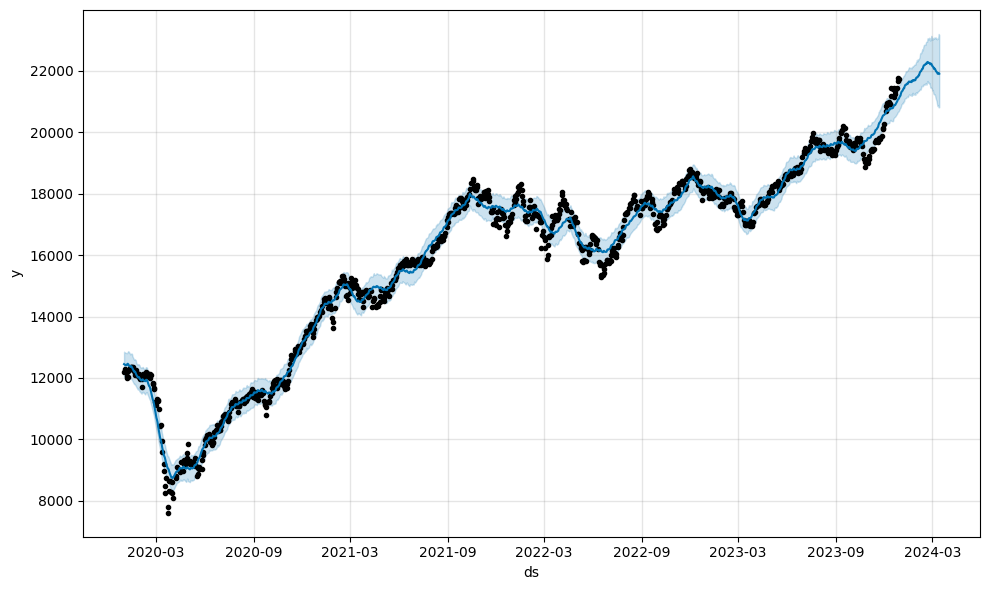

In [20]:
figure = model.plot(forecast,xlabel='ds',ylabel='y')

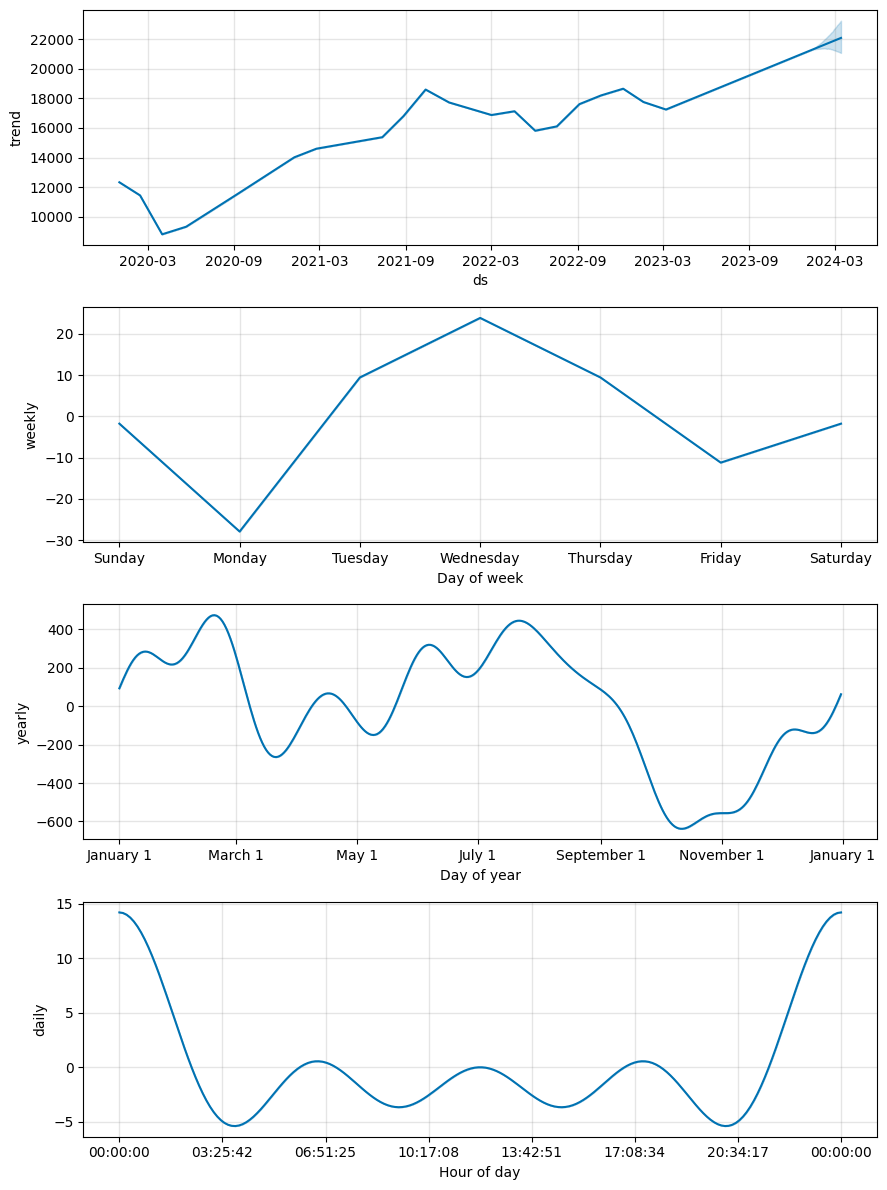

In [21]:
fig2 = model.plot_components(forecast)

##Downloading the Forecast data

In [22]:
from google.colab import files
forecast.to_csv('forecast_nse.csv')
files.download('forecast_nse.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Prediction on test Data

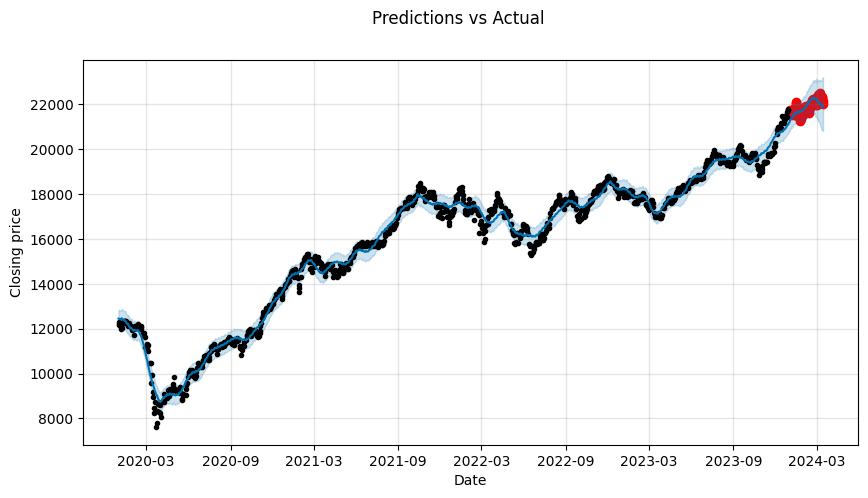

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pd.to_datetime(test_df['Date']), test_df['Close'], color='red')
fig = model.plot(forecast, ax=ax)
# ax.set_xbound(lower='2024-01-01',
#               upper='2024-03-14')
plt.xlabel('Date')
plt.ylabel('Closing price')
plot = plt.suptitle('Predictions vs Actual')

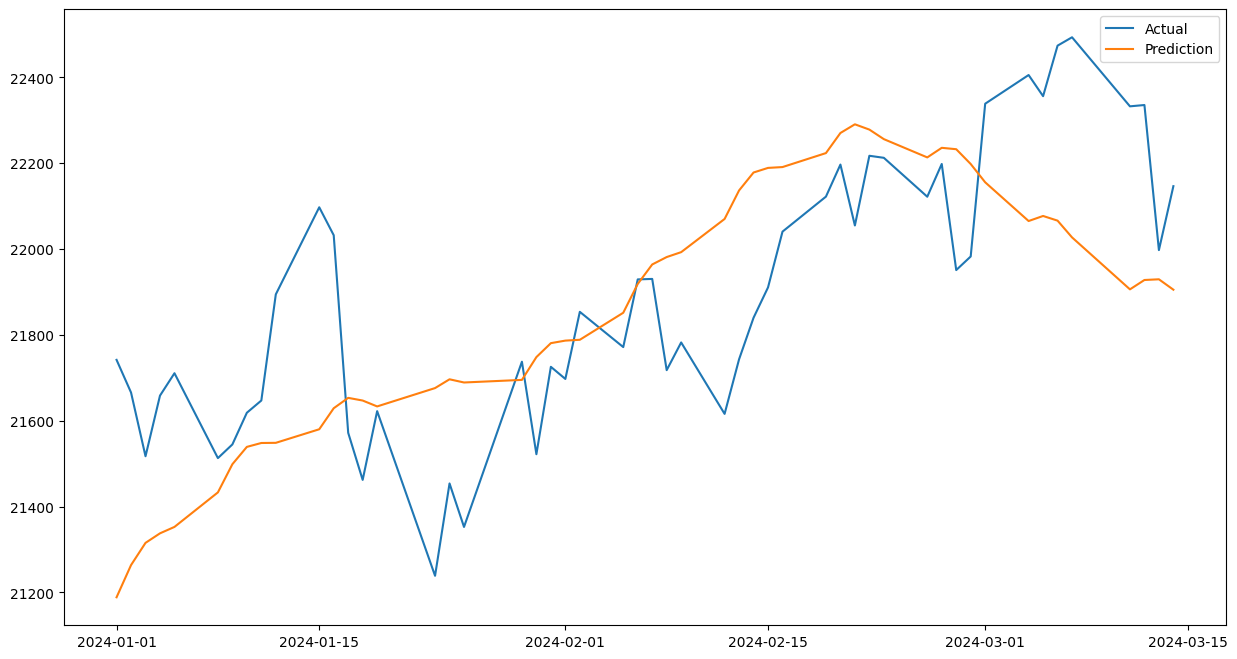

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
pred=forecast[forecast['ds'].isin(test_df['Date'])]
plt.plot(pd.to_datetime(test_df['Date']), test_df['Close'], label='Actual')
plt.plot(pd.to_datetime(test_df['Date']), pred['yhat'], label='Prediction')
plt.legend()
plt.show()

# Save the model

In [ ]:
with open('/content/drive/MyDrive/STOCK PRICE PRED/fbprophet_model.json', 'w') as fout:
    fout.write(model_to_json(model))

In [ ]:
with open('/content/drive/MyDrive/STOCK PRICE PRED/fbprophet_model.json', 'r') as fin:
    m = model_from_json(fin.read())

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:172: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')



In [ ]:
future2 = m.make_future_dataframe(periods=51+25)
forecast2 = m.predict(future)

In [ ]:
rmse,mape = print_rmse_mape(test_df,forecast2)
print('RMSE =',rmse)
print('MAPE =',mape)

RMSE = 270.000233104527
MAPE = 1.0165013579594433


In [ ]:
df = pd.DataFrame({'Model':['Facebook Prophet'],'RMSE':[rmse]})

In [ ]:
df

,Model,RMSE
0,Facebook Prophet,270.000233


In [ ]:
df.to_csv('/content/drive/MyDrive/STOCK PRICE PRED/Results_stock_price_pred.csv')

In [ ]:
help(Prophet.fit)

Help on function fit in module prophet.forecaster:

fit(self, df, **kwargs)
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    -------
    The fitted Prophet object.

In [ ]:
help(Prophet)

Help on class Prophet in module prophet.forecaster:

class Prophet(builtins.object)
 |  Prophet(growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, uncertainty_samples=1000, stan_backend=None, scaling: str = 'absmax', holidays_mode=None)
 |  
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
 |      flat trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_